In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics


BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

In [2]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

### beta peak

In [3]:
# mean of con. and ips. best ch. 
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_ECOG_CON["r2_con"], axis=1)), \
                np.arctanh(np.expand_dims(df_best_ECOG_IPS["r2_ips"], axis=1))), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_ECOG)
results = model.fit()
print(results.summary())

rho_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[0], 2)
p_val_ECOG = np.round(results.pvalues["b_peak"],3)

df_here_STN = df_best_STN_CON
df_here_STN["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_STN_CON["r2_con"], axis=1)), \
                np.arctanh(np.expand_dims(df_best_STN_IPS["r2_ips"], axis=1))), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_STN)
results = model.fit()
print(results.summary())

rho_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[0], 2)
p_val_STN = np.round(results.pvalues["b_peak"],3)


                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     9.279
Date:                Wed, 21 Oct 2020   Prob (F-statistic):            0.00872
Time:                        18:40:59   Log-Likelihood:                 9.2567
No. Observations:                  16   AIC:                            -14.51
Df Residuals:                      14   BIC:                            -12.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0987      0.110     -0.898      0.3

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [10]:
sns.regplot?

Text(0.5, 1.0, 'ECOG $\\rho$=0.55 p=0.009\nSTN $\\rho$=0.66 p=0.068\nSum of Beta Peaks No Movement periodic fit\n $R^2$: Mean of Con. and Ips. best performances')

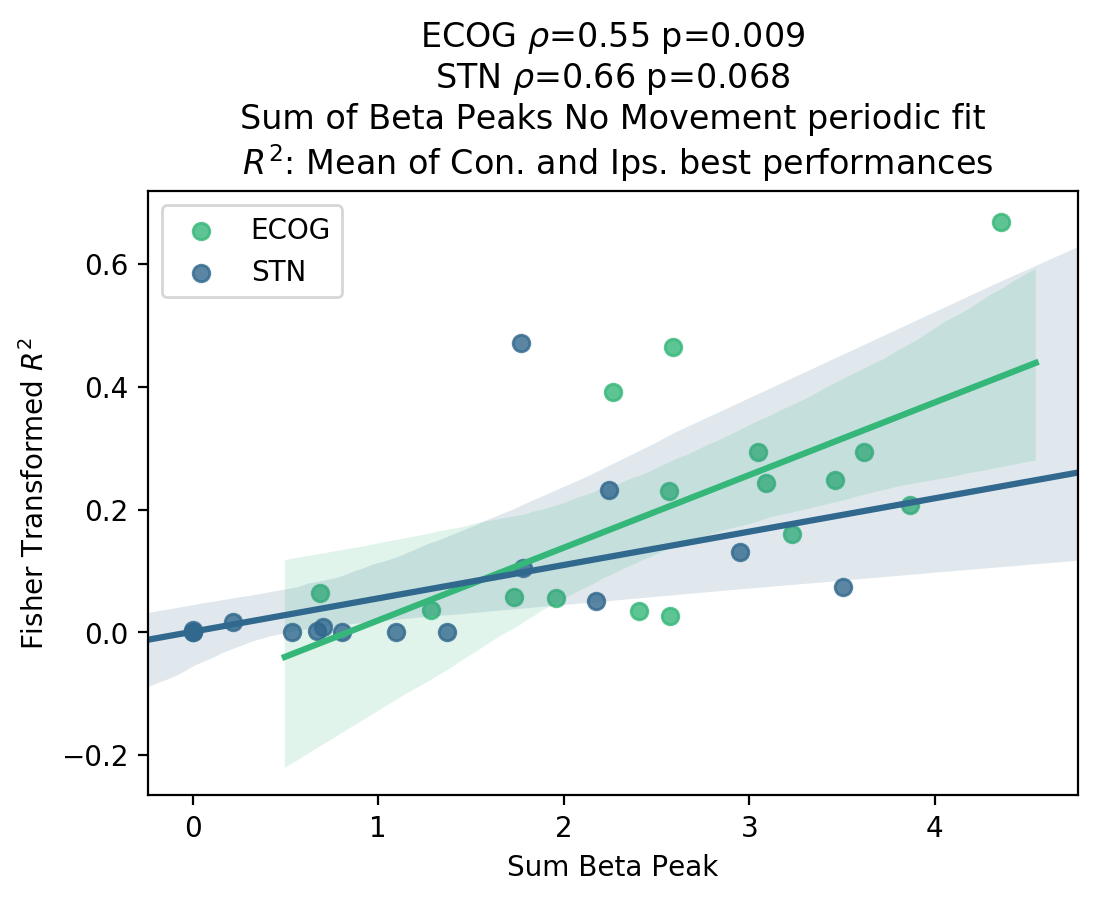

In [23]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="b_peak", y="r2", data=df_here_ECOG, label="ECOG", color=(53/255,183/255,121/255))
sns.regplot(x="b_peak", y="r2", data=df_here_STN, label="STN", color=(49/255,104/255,142/255))
plt.legend()
plt.xlabel("Sum Beta Peak")
plt.ylabel("Fisher Transformed "+r"$R^2$")
plt.title("ECOG "+ r"$\rho$"+"="+str(rho_ECOG)+" p="+str(p_val_ECOG)+\
          "\nSTN "+ r"$\rho$"+"="+str(rho_STN)+" p="+str(p_val_STN)+\
          "\nSum of Beta Peaks No Movement periodic fit\n "+\
          r"$R^2$"+": Mean of Con. and Ips. best performances")

### distance 

### best ch. 

In [3]:
# mean of con. and ips. best ch. 
df_here = df_best_ECOG_CON
df_here["r2Z"] =np.arctanh(df_best_ECOG_CON["r2_con"])
model = smf.ols("r2Z~dist_con", data=df_here)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    r2Z   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                   0.05576
Date:                Fri, 25 Sep 2020   Prob (F-statistic):              0.817
Time:                        18:23:07   Log-Likelihood:                -1.2527
No. Observations:                  16   AIC:                             6.505
Df Residuals:                      14   BIC:                             8.051
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3345      0.139      2.410      0.0

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


### Mean ch. 

In [23]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "dist_con"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=0.045454545454545456, pvalue=0.8944269969053026)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.2234
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.648
Time:                        08:07:11   Log-Likelihood:                 2.3545
No. Observations:                  11   AIC:                           -0.7090
Df Residuals:                       9   BIC:                           0.08681
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### was hier nur hilft ist das Mixed LM


### ECOG 

In [3]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]

df_here["r2_conZ"] = np.arctanh(df_all["r2_con"])
df_here["r2_ipsZ"] = np.arctanh(df_all["r2_ips"])

md = smf.mixedlm("r2_conZ ~ dist_con", data=df_here, groups=df_here["sub"])
mdf_con = md.fit()
summary_con = mdf_con.summary()
print("con")
print(summary_con)

md = smf.mixedlm("r2_ipsZ ~ dist_ips", data=df_here, groups=df_here["sub"])
mdf_ips = md.fit()
summary_ips = mdf_ips.summary()
print("ips")
print(summary_ips)

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


con
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_conZ 
No. Observations: 200     Method:             REML    
No. Groups:       11      Scale:              0.0150  
Min. group size:  6       Likelihood:         109.7659
Max. group size:  64      Converged:          Yes     
Mean group size:  18.2                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.197    0.062  3.169 0.002  0.075  0.319
dist_con    -0.002    0.000 -3.729 0.000 -0.003 -0.001
Group Var    0.039    0.157                           

ips
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_ipsZ 
No. Observations: 200     Method:             REML    
No. Groups:       11      Scale:              0.0025  
Min. group size:  6       Likelihood:         284.2192
Max. group size:  6

### STN

In [4]:
df_here_STN = df_all[df_all["loc"].str.contains("STN")]

df_here_STN["r2_conZ"] = np.arctanh(df_all["r2_con"])
df_here_STN["r2_ipsZ"] = np.arctanh(df_all["r2_ips"])

md = smf.mixedlm("r2_conZ ~ dist_con", data=df_here_STN, groups=df_here_STN["sub"])
mdf_con = md.fit()
summary_con = mdf_con.summary()
print("con")
print(summary_con)

md = smf.mixedlm("r2_ipsZ ~ dist_ips", data=df_here_STN, groups=df_here_STN["sub"])
mdf_ips = md.fit()
summary_ips = mdf_ips.summary()
print("ips")
print(summary_ips)

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


con
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_conZ
No. Observations: 48      Method:             REML   
No. Groups:       11      Scale:              0.0019 
Min. group size:  3       Likelihood:         51.9858
Max. group size:  6       Converged:          Yes    
Mean group size:  4.4                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.106    0.063  1.670 0.095 -0.018  0.230
dist_con   -0.009    0.005 -1.731 0.083 -0.020  0.001
Group Var   0.040    0.467                           

ips
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r2_ipsZ
No. Observations: 48      Method:             REML   
No. Groups:       11      Scale:              0.0036 
Min. group size:  3       Likelihood:         59.5250
Max. group size:  6       Converged

C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\ICN_admin\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [5]:
summary_con.tables[1].iloc[1]["P>|z|"]

'0.083'

In [6]:
summary_ips.tables[1].iloc[1]["P>|z|"]

'0.107'

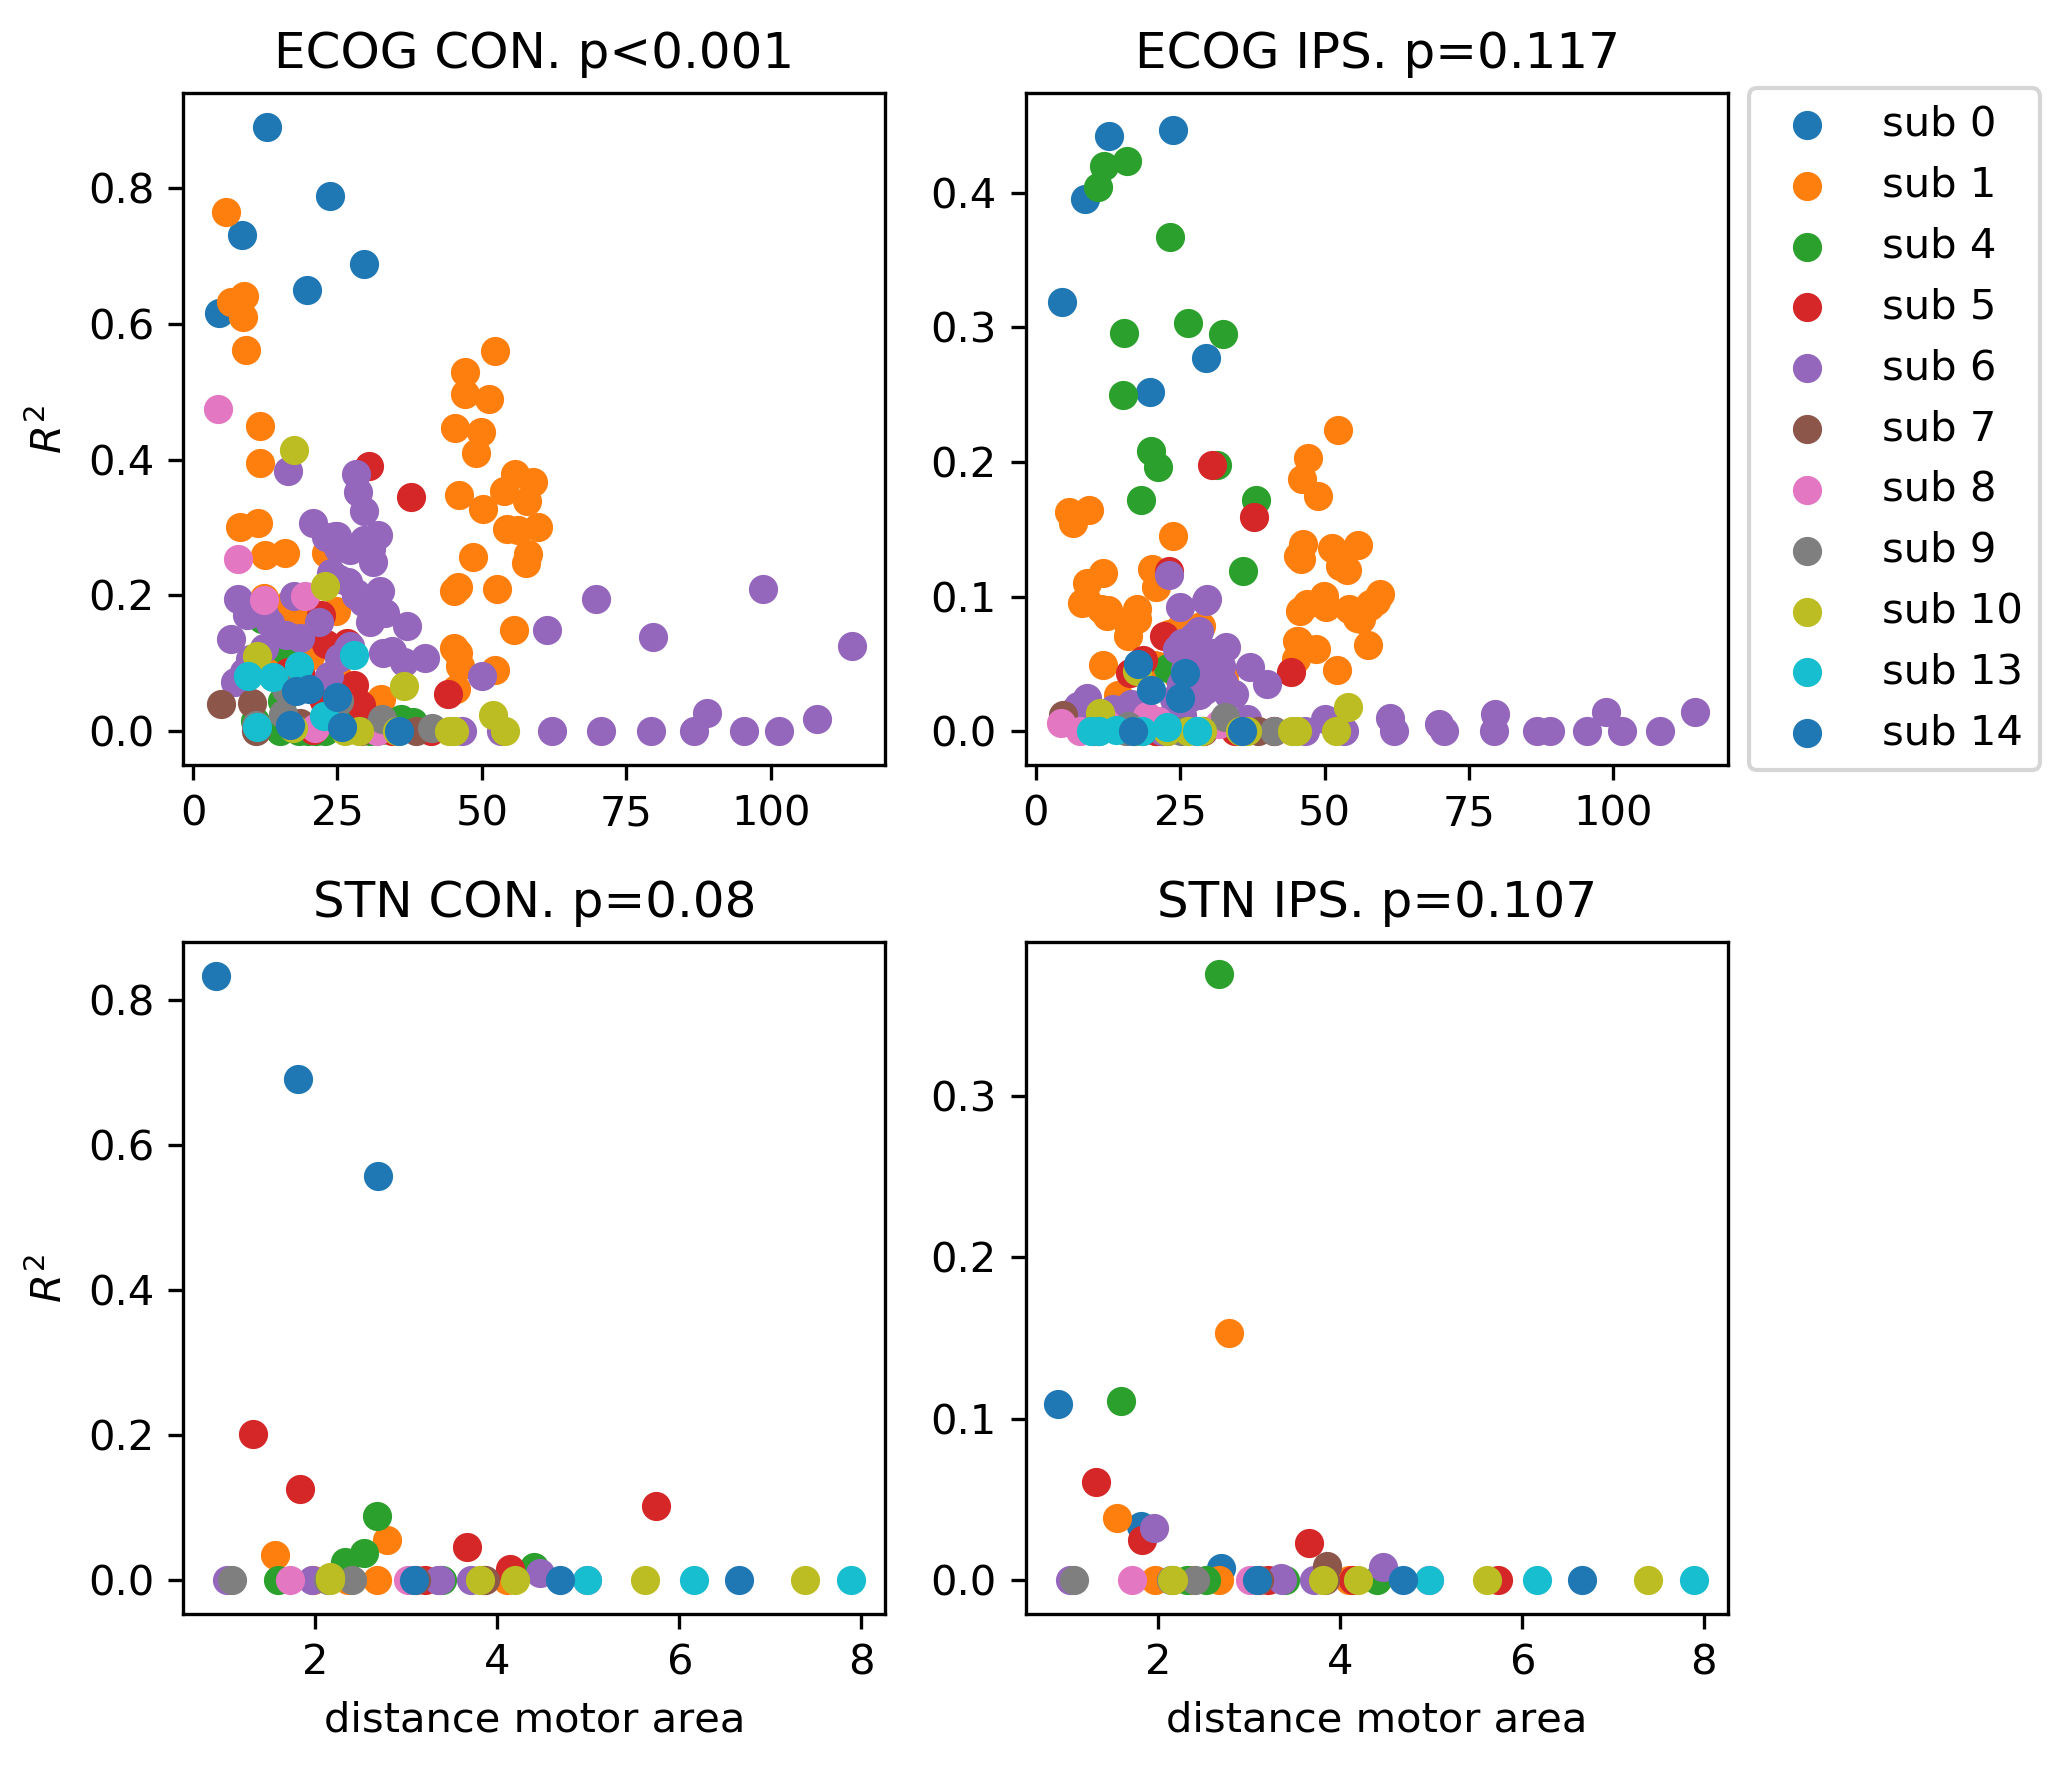

In [7]:
plt.figure(figsize=(7,6), dpi=300)
plt.subplot(221)
for sub in df_here["sub"].unique():
    df_ = df_here[df_here["sub"] == sub]
    plt.scatter(df_["dist_con"], df_["r2_conZ"], label="sub "+str(sub))
plt.ylabel(r"$R^2$")
plt.title("ECOG CON. p<0.001")
plt.subplot(222)
for sub in df_here["sub"].unique():
    df_ = df_here[df_here["sub"] == sub]
    plt.scatter(df_["dist_ips"], df_["r2_ipsZ"], label="sub "+str(sub))
plt.title("ECOG IPS. p=0.117")
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(223)
for sub in df_here_STN["sub"].unique():
    df_ = df_here_STN[df_here_STN["sub"] == sub]
    plt.scatter(df_["dist_con"], df_["r2_conZ"], label="sub "+str(sub))
plt.ylabel(r"$R^2$")
plt.title("STN CON. p=0.08")
plt.xlabel("distance motor area")
plt.subplot(224)
for sub in df_here_STN["sub"].unique():
    df_ = df_here_STN[df_here_STN["sub"] == sub]
    plt.scatter(df_["dist_ips"], df_["r2_ipsZ"], label="sub "+str(sub))
plt.title("STN IPS. p=0.107")
plt.xlabel("distance motor area")

plt.tight_layout()
plt.show()


### I would not use that one

Text(0.5, 1.0, 'ECOG Mixed Linear Model distance motor area\nDistance fixed effect con. p<0.001, ips. p=0.12')

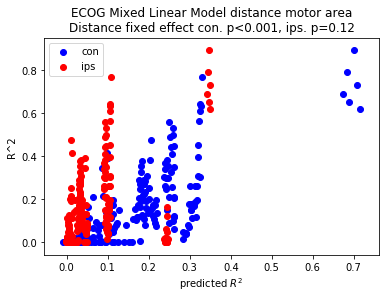

In [29]:
# plot for each subject one regression line 
plt.scatter(mdf_con.fittedvalues, df_here["r2_conZ"], color="blue", label="con")
plt.scatter(mdf_ips.fittedvalues, df_here["r2_conZ"], color="red", label="ips")
plt.xlabel("predicted "+r"$R^2$")
plt.ylabel(r"R^2")
plt.legend()
plt.title("ECOG Mixed Linear Model distance motor area\n"+"Distance fixed effect con. p<0.001, ips. p=0.12")

### UPDRS scores 

In [62]:
# first lateralized scores

UPDRS_rigidity_upper_extrimity_contralateral
UPDRS_rigidity_upper_extrimity_ipsilateral

UPDRS_combined_akinesia_rigidty_contalateral
UPDRS_combined_akinesia_rigidty_ipsilateral

UPDRS_total

### best ch 

In [64]:
df_here = df_best_ECOG_CON
df_here["r2_Z"] = np.arctanh(df_best_ECOG_CON["r2_con"])
model = smf.ols("r2_Z~UPDRS_rigidity_upper_extrimity_contralateral", data=df_here)
results = model.fit()
print(stats.spearmanr(df_here["r2_Z"], df_here["UPDRS_rigidity_upper_extrimity_contralateral"]))

print(results.summary())

SpearmanrResult(correlation=-0.2743977362280141, pvalue=0.3037286365548988)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.270
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.279
Time:                        09:53:04   Log-Likelihood:               -0.58983
No. Observations:                  16   AIC:                             5.180
Df Residuals:                      14   BIC:                             6.725
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------

C:\Users\ICN_admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [65]:
df_here = df_best_ECOG_CON
df_here["r2_Z"] = np.arctanh(df_best_ECOG_CON["r2_con"])
model = smf.ols("r2_Z~UPDRS_combined_akinesia_rigidty_contalateral", data=df_here)
results = model.fit()
print(stats.spearmanr(df_here["r2_Z"], df_here["UPDRS_combined_akinesia_rigidty_contalateral"]))

print(results.summary())

SpearmanrResult(correlation=-0.31633830618136655, pvalue=0.23260659436088837)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.257
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.155
Time:                        09:54:28   Log-Likelihood:              -0.088681
No. Observations:                  16   AIC:                             4.177
Df Residuals:                      14   BIC:                             5.723
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### mean ch. 

In [67]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_rigidity_upper_extrimity_contralateral"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5913012914266728, pvalue=0.055372781394902)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4.173
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0714
Time:                        09:55:24   Log-Likelihood:                 4.3149
No. Observations:                  11   AIC:                            -4.630
Df Residuals:                       9   BIC:                            -3.834
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [69]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_rigidity_upper_extrimity_ipsilateral"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.44447267815503955, pvalue=0.17078869063261348)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     4.425
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0647
Time:                        09:55:53   Log-Likelihood:                 4.4190
No. Observations:                  11   AIC:                            -4.838
Df Residuals:                       9   BIC:                            -4.042
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [68]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_combined_akinesia_rigidty_contalateral"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(df_here[df_here["sub"] == sub_]["r2_con"]).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp)
results = model.fit()
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5241725584537413, pvalue=0.09789163159980986)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     2.811
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.128
Time:                        09:55:24   Log-Likelihood:                 3.7145
No. Observations:                  11   AIC:                            -3.429
Df Residuals:                       9   BIC:                            -2.633
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### seems like UPDRS tot / combination of both needs to be best

In [83]:
# ECOG
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2_Z"] = (np.arctanh(df_best_ECOG_CON["r2_con"]) + np.arctanh(df_best_ECOG_IPS["r2_ips"]))/2
model = smf.ols("r2_Z~UPDRS_total", data=df_here_ECOG)
results = model.fit()
print(stats.spearmanr(df_here_ECOG["r2_Z"], df_here_ECOG["UPDRS_total"]))

print(results.summary())

SpearmanrResult(correlation=-0.48965354255503424, pvalue=0.05420762995402972)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     4.371
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0553
Time:                        10:08:36   Log-Likelihood:                 7.3623
No. Observations:                  16   AIC:                            -10.72
Df Residuals:                      14   BIC:                            -9.179
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [84]:
# STN
df_here_STN = df_best_STN_CON
df_here_STN["r2_Z"] = (np.arctanh(df_best_STN_CON["r2_con"]) + np.arctanh(df_best_STN_IPS["r2_ips"]))/2
model = smf.ols("r2_Z~UPDRS_total", data=df_here_STN)
results = model.fit()
print(stats.spearmanr(df_here_STN["r2_Z"], df_here_STN["UPDRS_total"]))

print(results.summary())

SpearmanrResult(correlation=-0.44200633629949654, pvalue=0.08649137532762655)
                            OLS Regression Results                            
Dep. Variable:                   r2_Z   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3.257
Date:                Fri, 04 Sep 2020   Prob (F-statistic):             0.0927
Time:                        10:08:48   Log-Likelihood:                 12.665
No. Observations:                  16   AIC:                            -21.33
Df Residuals:                      14   BIC:                            -19.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.49 p=0.054 STN: $\\rho$=-0.44 p=0.086\nUPDRS total \n $R^2$: Mean of Con. and Ips. best performances ')

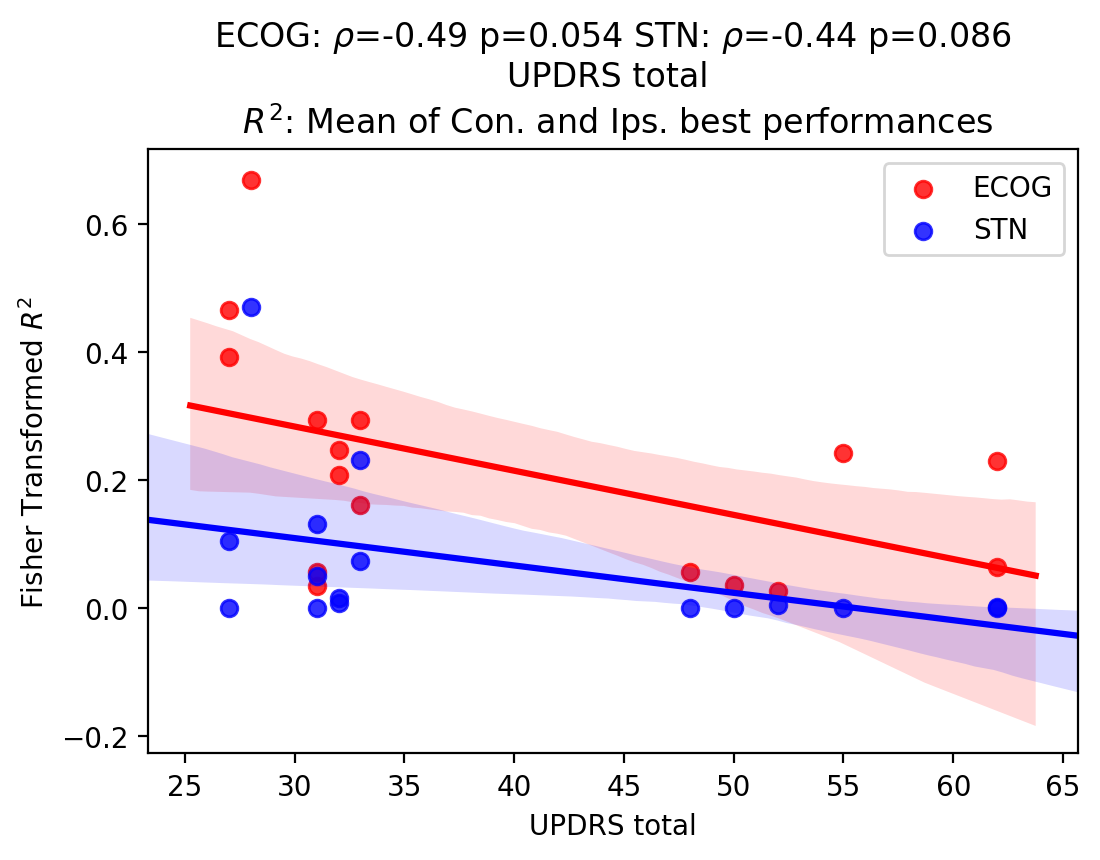

In [87]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="UPDRS_total", y="r2_Z", data=df_here_ECOG, color="red", label="ECOG")
sns.regplot(x="UPDRS_total", y="r2_Z", data=df_here_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.49 p=0.054"+" STN: "r"$\rho$"+"=-0.44 p=0.086"\
          "\nUPDRS total \n "+\
          r"$R^2$"+": Mean of Con. and Ips. best performances ")

### MEAN comparison UPDRS

In [89]:
# ECOG
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.200
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.107
Time:                        10:12:16   Log-Likelihood:                 7.2938
No. Observations:                  11   AIC:                            -10.59
Df Residuals:                       9   BIC:                            -9.792
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [90]:
# STN
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
    pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    #pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
    #                           df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5525691640126262, pvalue=0.07793082878582444)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.077
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.183
Time:                        10:13:34   Log-Likelihood:                 10.332
No. Observations:                  11   AIC:                            -16.66
Df Residuals:                       9   BIC:                            -15.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.55 p=0.11 STN: $\\rho$=-0.55 p=0.18\nUPDRS total\n $R^2$: Mean of Con. and Ips. mean performances ')

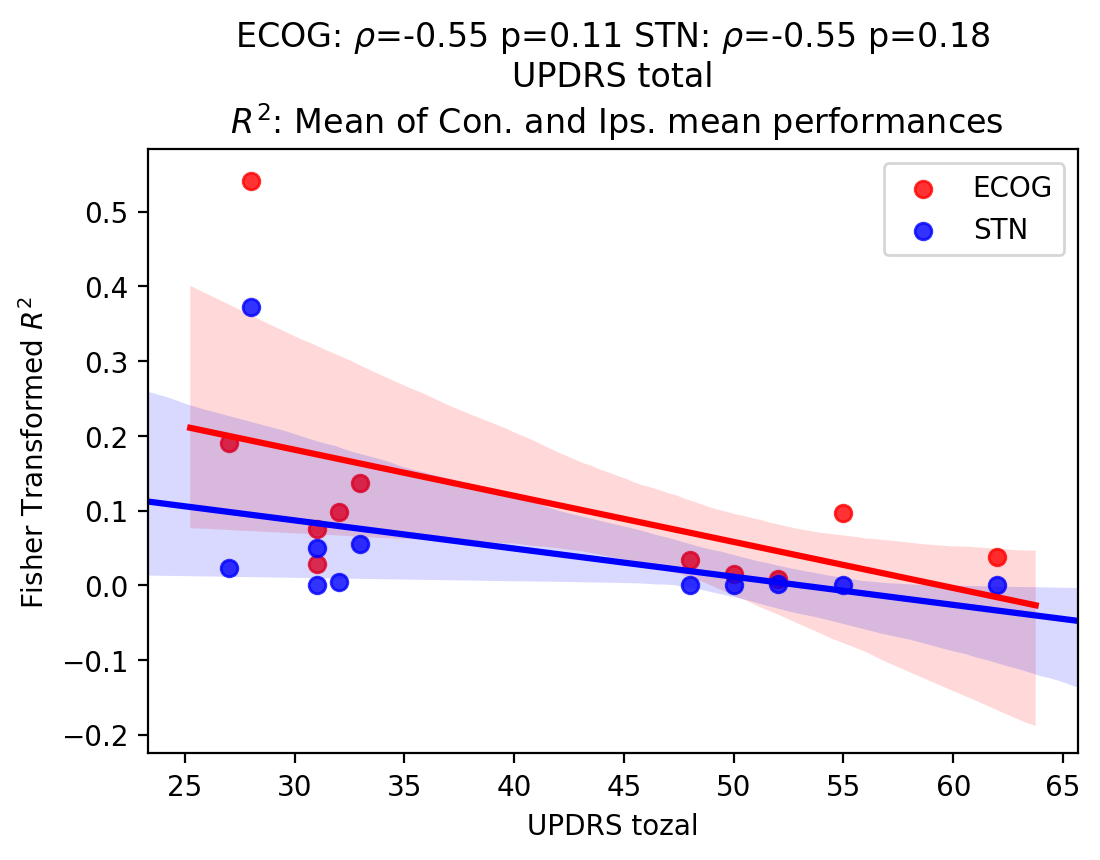

In [91]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color="red", label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS tozal")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.55 p=0.11"+" STN: "r"$\rho$"+"=-0.55 p=0.18"\
          "\nUPDRS total\n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")

### UPDRS_combined_akinesia_rigidty_contalateral

In [95]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_contalateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.4272727272727273, pvalue=0.189943724965427)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.661
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.137
Time:                        10:20:00   Log-Likelihood:                 7.0451
No. Observations:                  11   AIC:                            -10.09
Df Residuals:                       9   BIC:                            -9.294
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [96]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_contalateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_combined_akinesia_rigidty_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.6606437893829143, pvalue=0.026908806330395406)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.258
Date:                Fri, 04 Sep 2020   Prob (F-statistic):              0.167
Time:                        10:20:00   Log-Likelihood:                 10.421
No. Observations:                  11   AIC:                            -16.84
Df Residuals:                       9   BIC:                            -16.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.42 p=0.13 STN: $\\rho$=-0.66 p=0.17\nUPDRS: Mean of Con. Ips. UPDRS Akineasia Rigidity \n $R^2$: Mean of Con. and Ips. mean performances ')

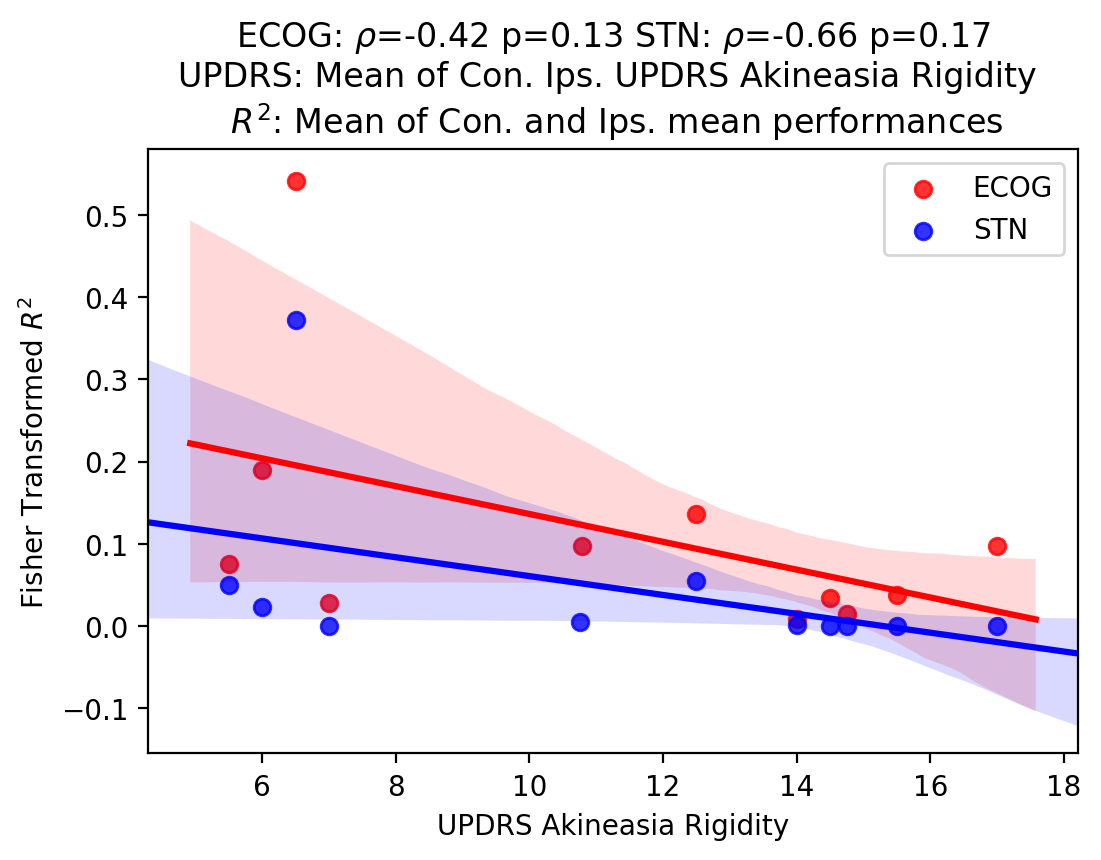

In [97]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color="red", label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN, color="blue", label="STN")
plt.legend()
plt.xlabel("UPDRS Akineasia Rigidity")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.42 p=0.13"+" STN: "r"$\rho$"+"=-0.66 p=0.17"\
          "\nUPDRS: Mean of Con. Ips. UPDRS Akineasia Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")

### stat. sign, 

In [25]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.6131617779732899, pvalue=0.04485069721774724)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     9.150
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0144
Time:                        18:57:07   Log-Likelihood:                 9.4786
No. Observations:                  11   AIC:                            -14.96
Df Residuals:                       9   BIC:                            -14.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [26]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.arctanh(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"]))).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.657241060772843, pvalue=0.027988158732147477)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     7.594
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0223
Time:                        18:57:08   Log-Likelihood:                 12.555
No. Observations:                  11   AIC:                            -21.11
Df Residuals:                       9   BIC:                            -20.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, 'ECOG: $\\rho$=-0.65 p=0.01 STN: $\\rho$=-0.66 p=0.022\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n $R^2$: Mean of Con. and Ips. mean performances ')

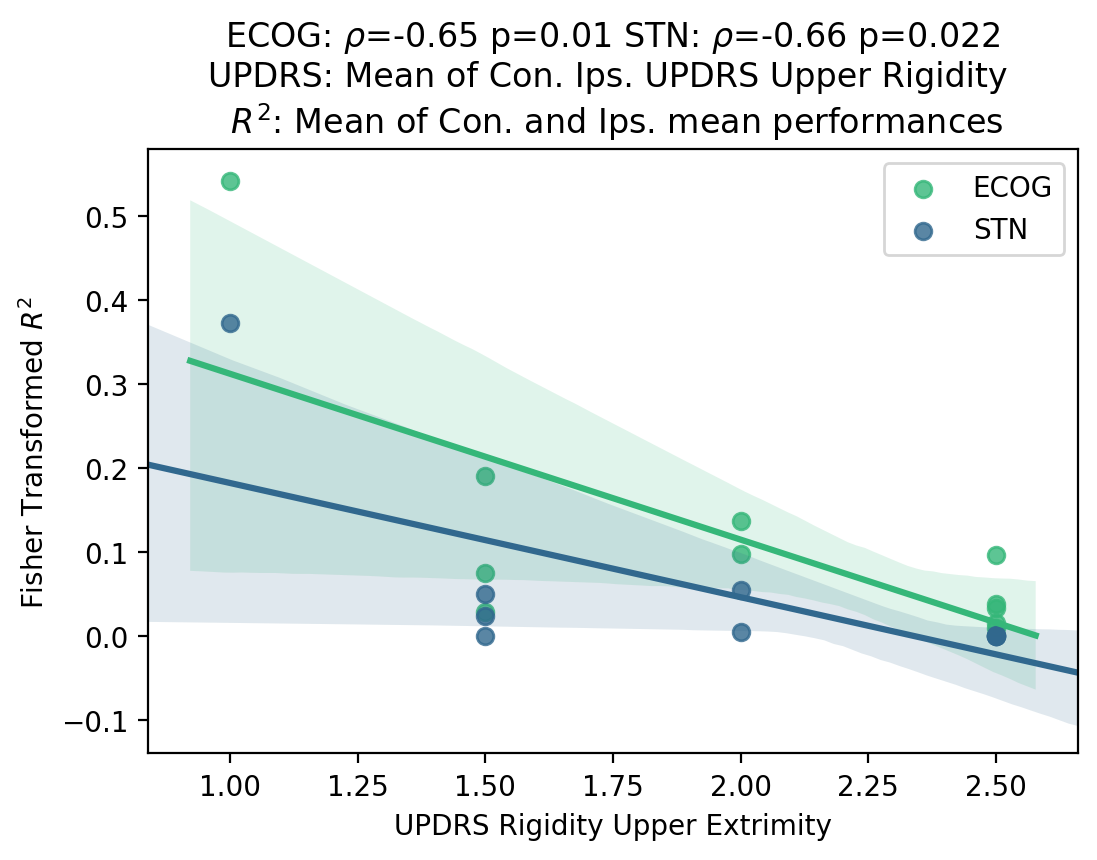

In [27]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS Rigidity Upper Extrimity")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title("ECOG: "r"$\rho$"+"=-0.65 p=0.01"+" STN: "r"$\rho$"+"=-0.66 p=0.022"\
          "\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances ")